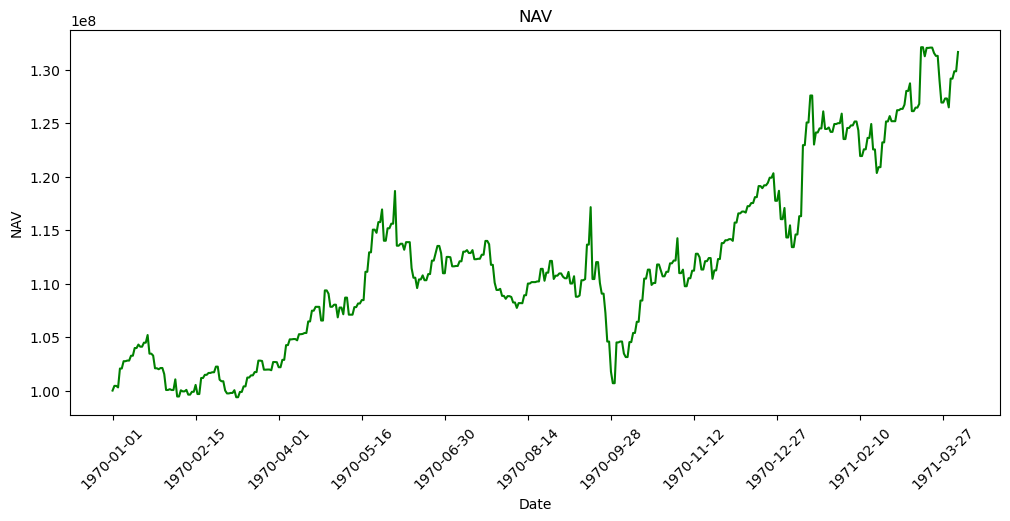

In [22]:
import matplotlib.pyplot as plt

df = pd.read_excel('nav.xlsx')

# Assuming the tensor column is named 'Tensor' and the date column is named 'Date'
# Convert the tensor column to numbers (assuming each tensor is a 1D tensor with one element)
from matplotlib.dates import DateFormatter

# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['NAV'], color='green')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.title('NAV')

# Set x-axis tick frequency to display only every nth date
n = len(df['Date']) // 10  # Display only every 10th date
plt.xticks(df['Date'][::n])

# Rotate the date labels for better readability (optional)
plt.xticks(rotation=45)

# Format the date labels
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('nav.png')

In [7]:
import pandas as pd
import numpy as np

# Load your data (replace 'input.xlsx' and 'NAV' with your actual file and column names)
df = pd.read_excel('nav.xlsx', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Convert the DataFrame index to a period index for quarters
df.index = df.index.to_period('Q')

# Calculate daily returns
df['Return'] = df['NAV'].pct_change()

# Calculate QTD return
current_quarter = df.index[-1]
qtd_return = df[df.index == current_quarter]['NAV'].iloc[-1] / df[df.index == current_quarter]['NAV'].iloc[0] - 1

# Calculate annualized volatility (standard deviation of daily returns)
volatility = df['Return'].std() * np.sqrt(252)  # Annualized volatility

# Calculate maximum drawdown
rolling_max = df['NAV'].cummax()
drawdown = (df['NAV'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Calculate Value at Risk (VaR)
confidence_level = 0.05
var = np.percentile(df['Return'].dropna(), 100 * confidence_level)

# Calculate annualized Sharpe ratio (assuming risk-free rate is 0 for simplicity)
risk_free_rate = 0.05
sharpe_ratio = (df['Return'].mean() - risk_free_rate) / df['Return'].std() * np.sqrt(252)

# Print the results
print(f"QTD Return: {qtd_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Value at Risk (VaR): {var:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


QTD Return: -0.0073
Volatility: 0.1376
Maximum Drawdown: -0.1424
Value at Risk (VaR): -0.0125
Sharpe Ratio: -90.4683


In [9]:
import pandas as pd
import numpy as np

# Load your data (replace 'input.xlsx' and 'NAV' with your actual file and column names)
df = pd.read_excel('nav.xlsx', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Calculate daily returns
df['Return'] = df['NAV'].pct_change()

# Define the annual risk-free rate
annual_risk_free_rate = 0.05

# Define a function to calculate metrics for a given period
def calculate_metrics(data, annual_risk_free_rate):
    # Calculate annualized volatility (standard deviation of daily returns)
    volatility = data['Return'].std() * np.sqrt(252)  # Annualized volatility
    
    # Calculate maximum drawdown
    rolling_max = data['NAV'].cummax()
    drawdown = (data['NAV'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    
    # Calculate Value at Risk (VaR)
    confidence_level = 0.05
    var = np.percentile(data['Return'].dropna(), 100 * confidence_level)
    
    # Calculate annualized Sharpe ratio
    average_annual_return = data['Return'].mean() * 252
    sharpe_ratio = (average_annual_return - annual_risk_free_rate) / volatility
    
    return volatility, max_drawdown, var, sharpe_ratio

# Filter data for the past 1 year
one_year_data = df.loc[df.index >= df.index.max() - pd.DateOffset(years=1)]

# Filter data for the past 3 years
three_years_data = df.loc[df.index >= df.index.max() - pd.DateOffset(years=3)]

# Calculate QTD return
df.index = df.index.to_period('Q')
current_quarter = df.index[-1]
qtd_return = df[df.index == current_quarter]['NAV'].iloc[-1] / df[df.index == current_quarter]['NAV'].iloc[0] - 1

# Calculate metrics for 1 year
one_year_metrics = calculate_metrics(one_year_data, annual_risk_free_rate)
one_year_volatility, one_year_max_drawdown, one_year_var, one_year_sharpe_ratio = one_year_metrics
one_year_return = one_year_data['NAV'].iloc[-1] / one_year_data['NAV'].iloc[0] - 1

# Calculate metrics for 3 years
three_years_metrics = calculate_metrics(three_years_data, annual_risk_free_rate)
three_years_volatility, three_years_max_drawdown, three_years_var, three_years_sharpe_ratio = three_years_metrics
three_year_return = three_years_data['NAV'].iloc[-1] / three_years_data['NAV'].iloc[0] - 1

# Print the results
print(f"QTD Return: {qtd_return:.4f}")
print(f"1-Year Return: {one_year_return:.4f}")
print(f"1-Year Volatility: {one_year_volatility:.4f}")
print(f"1-Year Maximum Drawdown: {one_year_max_drawdown:.4f}")
print(f"1-Year Value at Risk (VaR): {one_year_var:.4f}")
print(f"1-Year Sharpe Ratio: {one_year_sharpe_ratio:.4f}")

print(f"3-Year Return: {three_year_return:.4f}")
print(f"3-Year Volatility: {three_years_volatility:.4f}")
print(f"3-Year Maximum Drawdown: {three_years_max_drawdown:.4f}")
print(f"3-Year Value at Risk (VaR): {three_years_var:.4f}")
print(f"3-Year Sharpe Ratio: {three_years_sharpe_ratio:.4f}")


QTD Return: -0.0073
1-Year Return: 0.1758
1-Year Volatility: 0.1684
1-Year Maximum Drawdown: -0.0935
1-Year Value at Risk (VaR): -0.0161
1-Year Sharpe Ratio: 0.8417
3-Year Return: 0.2885
3-Year Volatility: 0.1376
3-Year Maximum Drawdown: -0.1424
3-Year Value at Risk (VaR): -0.0125
3-Year Sharpe Ratio: 0.7194


[*********************100%%**********************]  1 of 1 completed


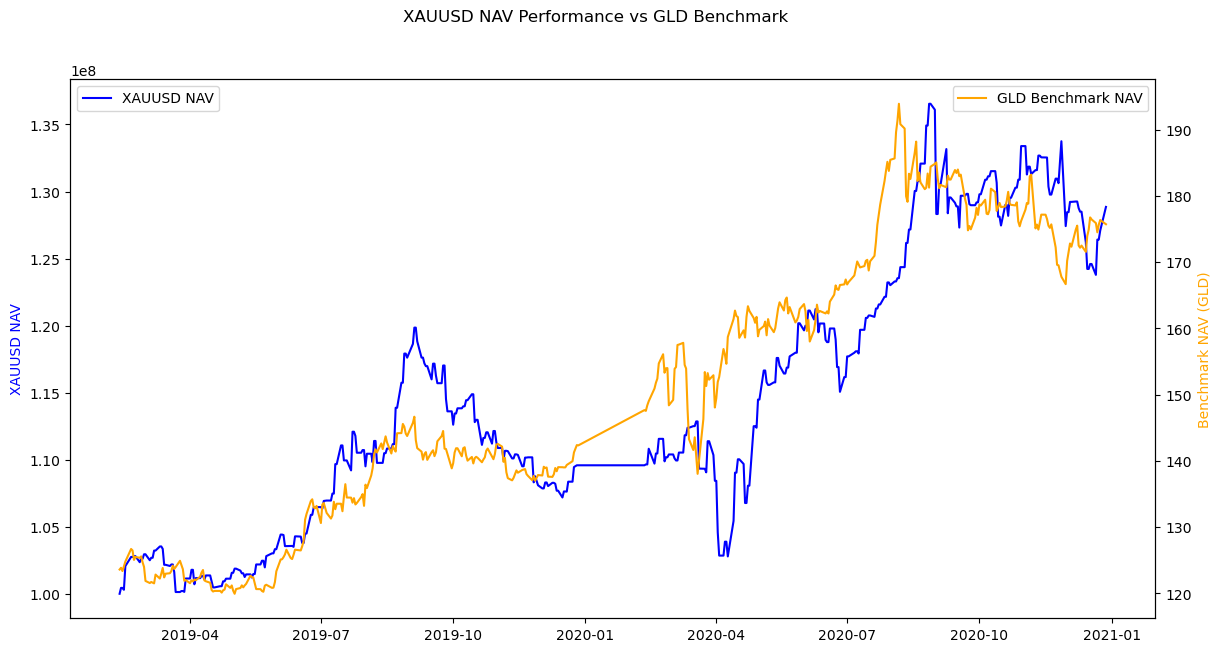

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch benchmark data (SPDR Gold Shares - GLD)
ticker = 'GLD'
benchmark_data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
benchmark_data['Benchmark Return'] = benchmark_data['Adj Close'].pct_change()

# Fetch your XAUUSD NAV data
nav_data = pd.read_excel('nav.xlsx', parse_dates=['Date'])
nav_data.set_index('Date', inplace=True)
nav_data['NAV Return'] = nav_data['NAV'].pct_change()

# Ensure NAV data aligns with benchmark data
aligned_data = nav_data.join(benchmark_data[['Adj Close', 'Benchmark Return']], how='inner')
aligned_data.rename(columns={'Adj Close': 'Benchmark NAV'}, inplace=True)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot NAV
ax1.plot(aligned_data.index, aligned_data['NAV'], color='blue', label='XAUUSD NAV')
ax1.set_ylabel('XAUUSD NAV', color='blue')

# Create a secondary y-axis for the benchmark
ax2 = ax1.twinx()
ax2.plot(aligned_data.index, aligned_data['Benchmark NAV'], color='orange', label='GLD Benchmark NAV')
ax2.set_ylabel('Benchmark NAV (GLD)', color='orange')

# Add legend and titles
fig.suptitle('XAUUSD NAV Performance vs GLD Benchmark')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


[*********************100%%**********************]  1 of 1 completed


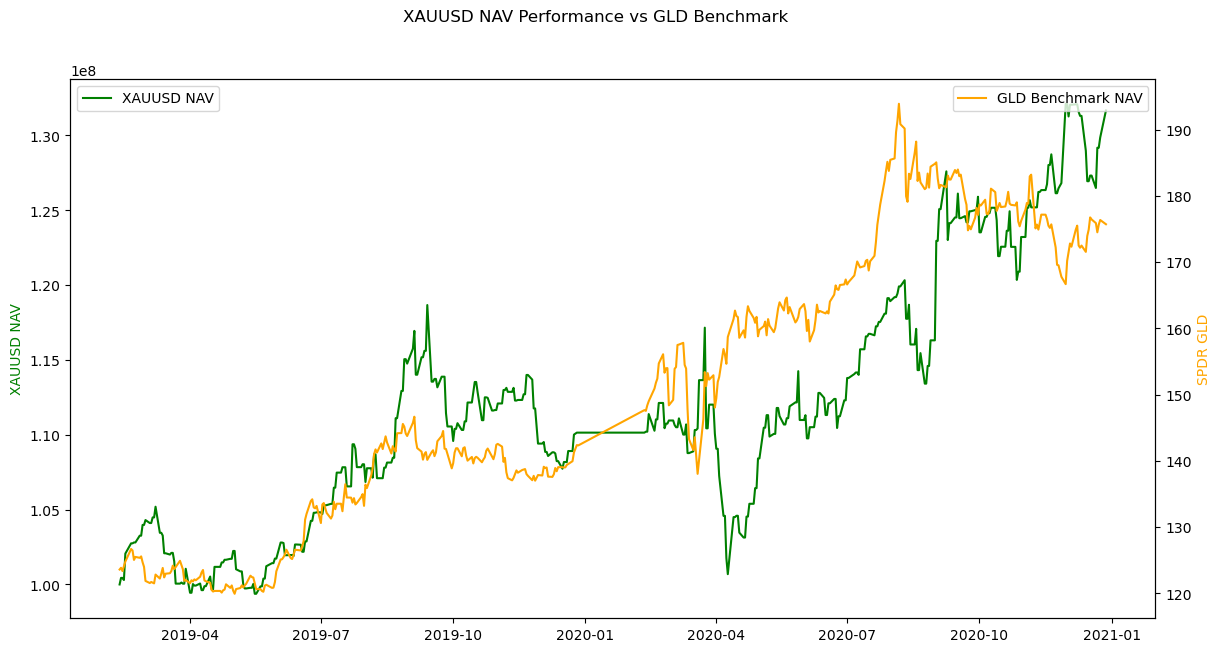

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch benchmark data (SPDR Gold Shares - GLD)
ticker = 'GLD'
benchmark_data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
benchmark_data['Benchmark Return'] = benchmark_data['Adj Close'].pct_change()

# Fetch your XAUUSD NAV data
nav_data = pd.read_excel('nav.xlsx', parse_dates=['Date'])
nav_data.set_index('Date', inplace=True)
nav_data['NAV Return'] = nav_data['NAV'].pct_change()

# Ensure NAV data aligns with benchmark data
aligned_data = nav_data.join(benchmark_data[['Adj Close', 'Benchmark Return']], how='inner')
aligned_data.rename(columns={'Adj Close': 'Benchmark NAV'}, inplace=True)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot NAV
ax1.plot(aligned_data.index, aligned_data['NAV'], color='green', label='XAUUSD NAV')
ax1.set_ylabel('XAUUSD NAV', color='green')

# Create a secondary y-axis for the benchmark
ax2 = ax1.twinx()
ax2.plot(aligned_data.index, aligned_data['Benchmark NAV'], color='orange', label='GLD Benchmark NAV')
ax2.set_ylabel('SPDR GLD', color='orange')

# Add legend and titles
fig.suptitle('XAUUSD NAV Performance vs GLD Benchmark')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


[*********************100%%**********************]  1 of 1 completed


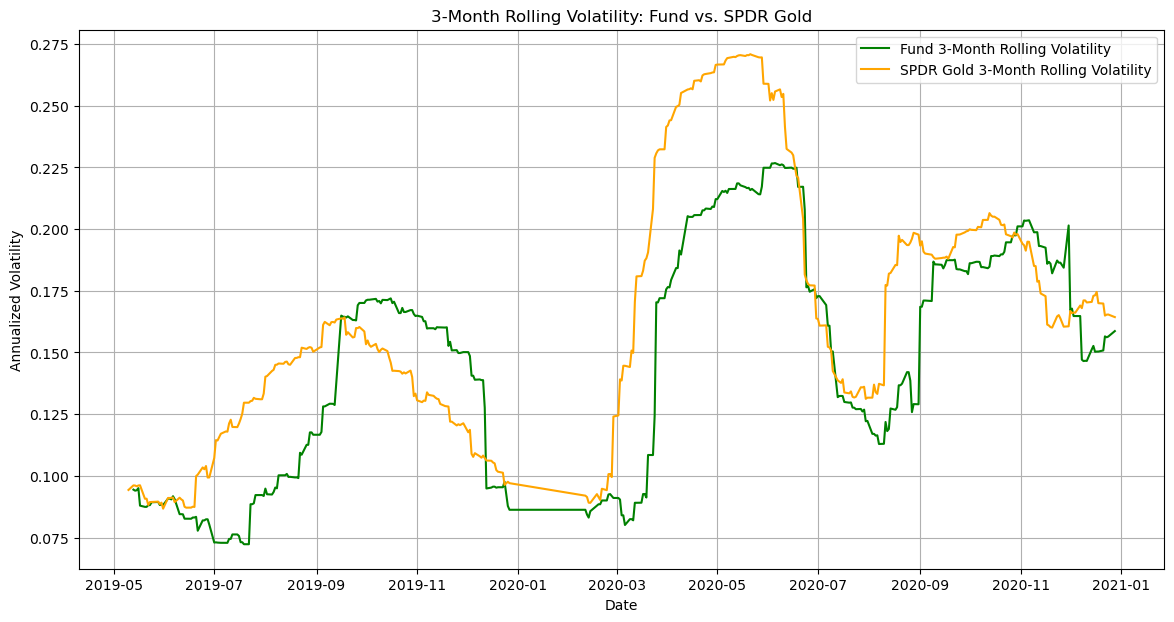

In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch benchmark data (SPDR Gold Shares - GLD)
ticker = 'GLD'
benchmark_data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
benchmark_data['Benchmark Return'] = benchmark_data['Adj Close'].pct_change()

# Fetch your XAUUSD NAV data
nav_data = pd.read_excel('nav.xlsx', parse_dates=['Date'])
nav_data.set_index('Date', inplace=True)
nav_data['NAV Return'] = nav_data['NAV'].pct_change()

# Ensure NAV data aligns with benchmark data
aligned_data = nav_data.join(benchmark_data[['Adj Close', 'Benchmark Return']], how='inner')
aligned_data.rename(columns={'Adj Close': 'Benchmark NAV'}, inplace=True)

# Calculate 3-month rolling volatility (approximately 63 trading days)
window_size = 63
aligned_data['NAV Rolling Volatility'] = aligned_data['NAV Return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized
aligned_data['Benchmark Rolling Volatility'] = aligned_data['Benchmark Return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot 3-month rolling volatility of NAV
plt.plot(aligned_data.index, aligned_data['NAV Rolling Volatility'], label='Fund 3-Month Rolling Volatility', color='green')

# Plot 3-month rolling volatility of the benchmark
plt.plot(aligned_data.index, aligned_data['Benchmark Rolling Volatility'], label='SPDR Gold 3-Month Rolling Volatility', color='orange')

# Add legend and titles
plt.title('3-Month Rolling Volatility: Fund vs. SPDR Gold')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


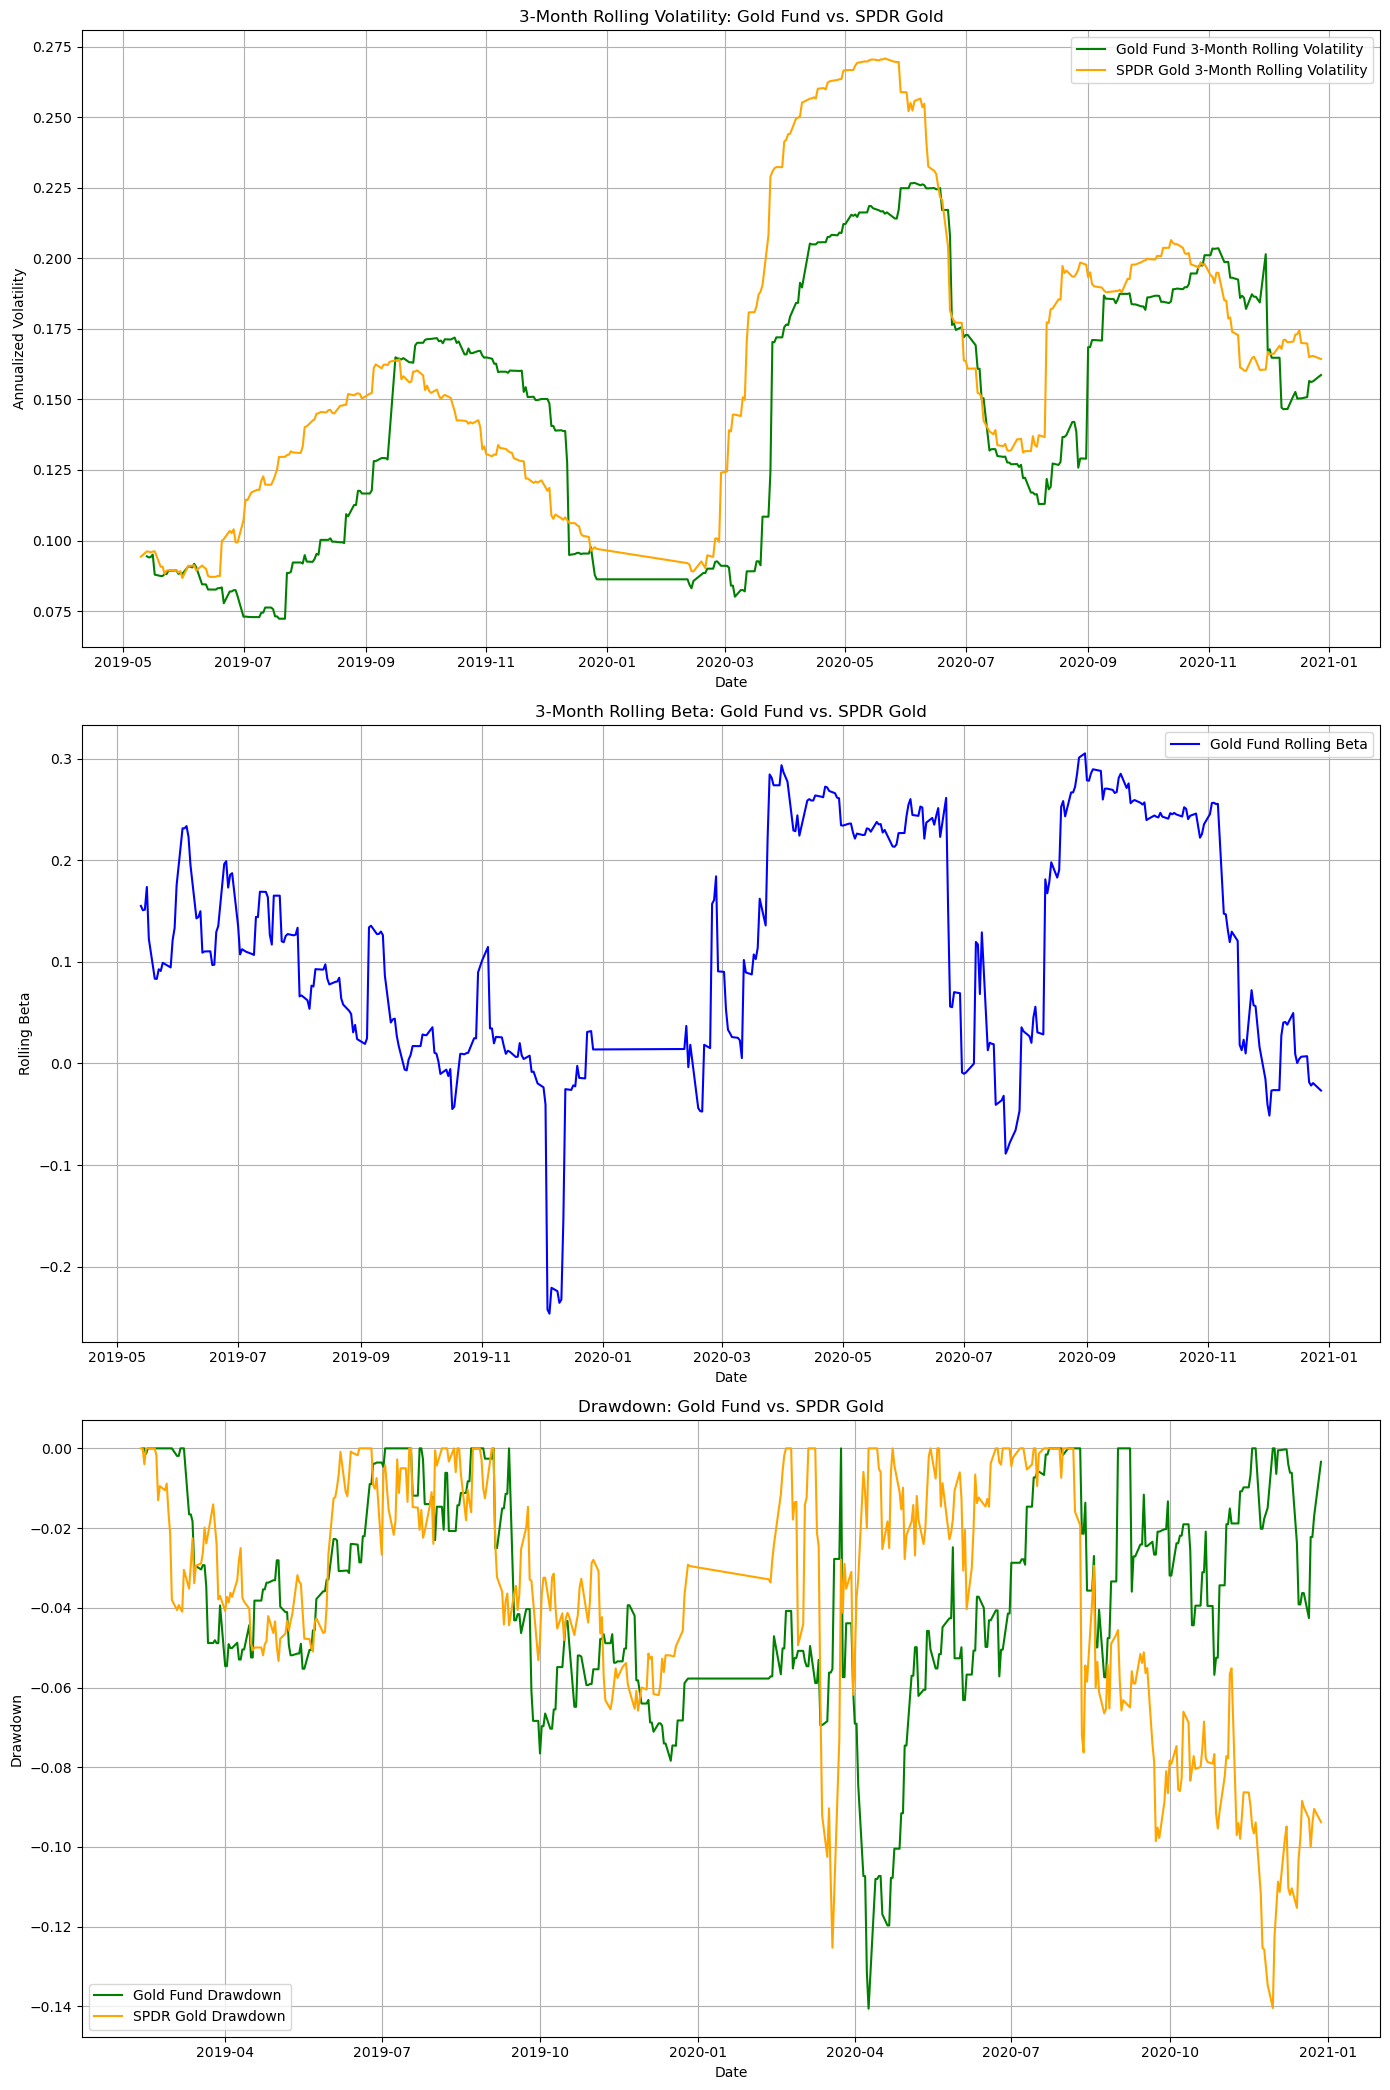

In [19]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch benchmark data (SPDR Gold Shares - GLD)
ticker = 'GLD'
benchmark_data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
benchmark_data['Benchmark Return'] = benchmark_data['Adj Close'].pct_change()

# Fetch your XAUUSD NAV data
nav_data = pd.read_excel('nav.xlsx', parse_dates=['Date'])
nav_data.set_index('Date', inplace=True)
nav_data['NAV Return'] = nav_data['NAV'].pct_change()

# Ensure NAV data aligns with benchmark data
aligned_data = nav_data.join(benchmark_data[['Adj Close', 'Benchmark Return']], how='inner')
aligned_data.rename(columns={'Adj Close': 'Benchmark NAV'}, inplace=True)

# Calculate 3-month rolling volatility (approximately 63 trading days)
window_size = 63
aligned_data['Gold Fund Rolling Volatility'] = aligned_data['NAV Return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized
aligned_data['SPDR Gold Rolling Volatility'] = aligned_data['Benchmark Return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized

# Calculate rolling beta
covariance = aligned_data['NAV Return'].rolling(window=window_size).cov(aligned_data['Benchmark Return'])
benchmark_variance = aligned_data['Benchmark Return'].rolling(window=window_size).var()
aligned_data['Rolling Beta'] = covariance / benchmark_variance

# Calculate drawdown
aligned_data['Gold Fund Cumulative'] = (1 + aligned_data['NAV Return']).cumprod()
aligned_data['SPDR Gold Cumulative'] = (1 + aligned_data['Benchmark Return']).cumprod()
aligned_data['Gold Fund Drawdown'] = aligned_data['Gold Fund Cumulative'] / aligned_data['Gold Fund Cumulative'].cummax() - 1
aligned_data['SPDR Gold Drawdown'] = aligned_data['SPDR Gold Cumulative'] / aligned_data['SPDR Gold Cumulative'].cummax() - 1

# Plotting the data
fig, axs = plt.subplots(3, 1, figsize=(14, 21))

# Plot 3-month rolling volatility
axs[0].plot(aligned_data.index, aligned_data['Gold Fund Rolling Volatility'], label='Gold Fund 3-Month Rolling Volatility', color='green')
axs[0].plot(aligned_data.index, aligned_data['SPDR Gold Rolling Volatility'], label='SPDR Gold 3-Month Rolling Volatility', color='orange')
axs[0].set_title('3-Month Rolling Volatility: Gold Fund vs. SPDR Gold')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Annualized Volatility')
axs[0].legend()
axs[0].grid(True)

# Plot rolling beta
axs[1].plot(aligned_data.index, aligned_data['Rolling Beta'], label='Gold Fund Rolling Beta', color='blue')
axs[1].set_title('3-Month Rolling Beta: Gold Fund vs. SPDR Gold')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Rolling Beta')
axs[1].legend()
axs[1].grid(True)

# Plot drawdown
axs[2].plot(aligned_data.index, aligned_data['Gold Fund Drawdown'], label='Gold Fund Drawdown', color='green')
axs[2].plot(aligned_data.index, aligned_data['SPDR Gold Drawdown'], label='SPDR Gold Drawdown', color='orange')
axs[2].set_title('Drawdown: Gold Fund vs. SPDR Gold')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Drawdown')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
/var/folders/dv/v09r6fhd6mbc4b2pf4g8mm480000gn/T/ipykernel_11211/3280613086.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aligned_data['Gold Fund Monthly Return'] = aligned_data['NAV'].resample('M').ffill().pct_change()
/var/folders/dv/v09r6fhd6mbc4b2pf4g8mm480000gn/T/ipykernel_11211/3280613086.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aligned_data['SPDR Gold Monthly Return'] = aligned_data['SPDR Gold'].resample('M').ffill().pct_change()


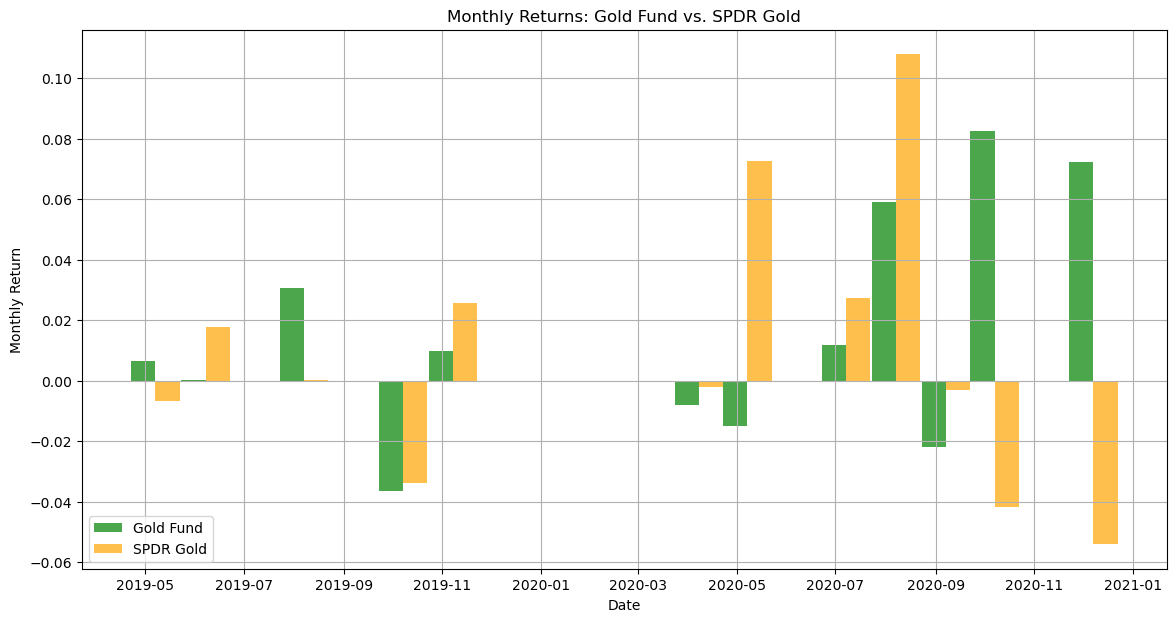

In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch benchmark data (SPDR Gold Shares - GLD)
benchmark_ticker = 'GLD'
benchmark_data = yf.download(benchmark_ticker, start='2010-01-01', end='2023-01-01')

# Fetch your XAUUSD NAV data
nav_data = pd.read_excel('nav.xlsx', parse_dates=['Date'])
nav_data.set_index('Date', inplace=True)

# Ensure NAV data aligns with benchmark data
aligned_data = nav_data.join(benchmark_data['Adj Close'], how='inner')
aligned_data.rename(columns={'Adj Close': 'SPDR Gold'}, inplace=True)

# Calculate monthly returns
aligned_data['Gold Fund Monthly Return'] = aligned_data['NAV'].resample('M').ffill().pct_change()
aligned_data['SPDR Gold Monthly Return'] = aligned_data['SPDR Gold'].resample('M').ffill().pct_change()

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Gold Fund monthly returns
plt.bar(aligned_data.index, aligned_data['Gold Fund Monthly Return'], width=15, alpha=0.7, label='Gold Fund', color='green')

# Plot SPDR Gold monthly returns
plt.bar(aligned_data.index + pd.DateOffset(days=15), aligned_data['SPDR Gold Monthly Return'], width=15, alpha=0.7, label='SPDR Gold', color='orange')

# Add legend and titles
plt.title('Monthly Returns: Gold Fund vs. SPDR Gold')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed
/var/folders/dv/v09r6fhd6mbc4b2pf4g8mm480000gn/T/ipykernel_11211/4195188558.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aligned_data['Gold Fund Monthly Return'] = aligned_data['NAV'].resample('M').ffill().pct_change()
/var/folders/dv/v09r6fhd6mbc4b2pf4g8mm480000gn/T/ipykernel_11211/4195188558.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aligned_data['SPDR Gold Monthly Return'] = aligned_data['SPDR Gold'].resample('M').ffill().pct_change()


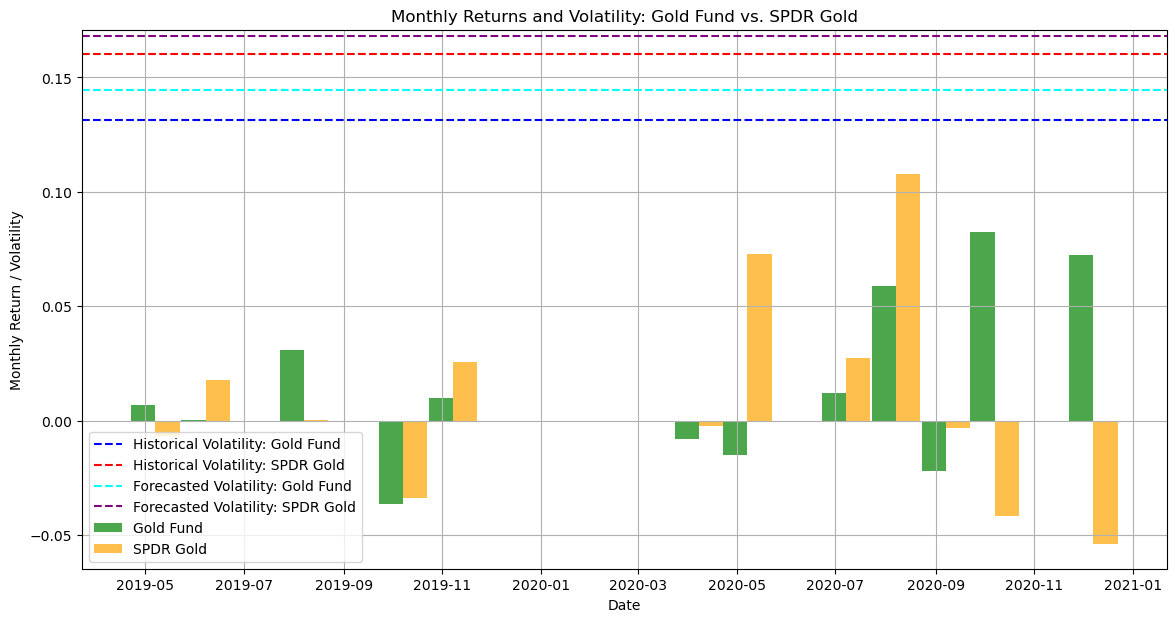

In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch benchmark data (SPDR Gold Shares - GLD)
benchmark_ticker = 'GLD'
benchmark_data = yf.download(benchmark_ticker, start='2010-01-01', end='2023-01-01')

# Fetch your XAUUSD NAV data
nav_data = pd.read_excel('nav.xlsx', parse_dates=['Date'])
nav_data.set_index('Date', inplace=True)

# Ensure NAV data aligns with benchmark data
aligned_data = nav_data.join(benchmark_data['Adj Close'], how='inner')
aligned_data.rename(columns={'Adj Close': 'SPDR Gold'}, inplace=True)

# Calculate monthly returns
aligned_data['Gold Fund Monthly Return'] = aligned_data['NAV'].resample('M').ffill().pct_change()
aligned_data['SPDR Gold Monthly Return'] = aligned_data['SPDR Gold'].resample('M').ffill().pct_change()

# Calculate historical volatility (for demonstration)
historical_volatility_gold_fund = aligned_data['Gold Fund Monthly Return'].std() * np.sqrt(12)  # Annualized
historical_volatility_spdr_gold = aligned_data['SPDR Gold Monthly Return'].std() * np.sqrt(12)  # Annualized

# Example: Assume a simple forecast for demonstration
forecasted_volatility_gold_fund = historical_volatility_gold_fund * 1.1  # 10% increase for demonstration
forecasted_volatility_spdr_gold = historical_volatility_spdr_gold * 1.05  # 5% increase for demonstration

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot Gold Fund and SPDR Gold monthly returns
plt.bar(aligned_data.index, aligned_data['Gold Fund Monthly Return'], width=15, alpha=0.7, label='Gold Fund', color='green')
plt.bar(aligned_data.index + pd.DateOffset(days=15), aligned_data['SPDR Gold Monthly Return'], width=15, alpha=0.7, label='SPDR Gold', color='orange')

# Plot historical volatility
plt.axhline(y=historical_volatility_gold_fund, color='blue', linestyle='--', label='Historical Volatility: Gold Fund')
plt.axhline(y=historical_volatility_spdr_gold, color='red', linestyle='--', label='Historical Volatility: SPDR Gold')

# Plot forecasted volatility
plt.axhline(y=forecasted_volatility_gold_fund, color='cyan', linestyle='--', label='Forecasted Volatility: Gold Fund')
plt.axhline(y=forecasted_volatility_spdr_gold, color='purple', linestyle='--', label='Forecasted Volatility: SPDR Gold')

# Add legend and titles
plt.title('Monthly Returns and Volatility: Gold Fund vs. SPDR Gold')
plt.xlabel('Date')
plt.ylabel('Monthly Return / Volatility')
plt.legend()
plt.grid(True)
plt.show()
